In [127]:
import pandas as pd
import seaborn as sns
import numpy as np

In [128]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [129]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [2]:
penguins = sns.load_dataset("penguins").dropna()
penguins.head()

NameError: name 'sns' is not defined

In [151]:
penguins.corr().style.background_gradient(cmap='coolwarm', axis=None)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


## Portfolio assignment 15
30 min: Train a decision tree to predict the species of a penguin based on their characteristics.
- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree_classification function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

Optional: Perform the same tasks but try to predict the sex of the pinguin based on the other columns

In [152]:
# Split the penguin dataset into a train (70%) and test (30%) set.
# Goal: guess type species
penguinTraining, penguinTest = train_test_split(penguins, test_size=0.3, random_state=42, stratify=penguins['species']);

print(penguinTraining.shape)
print(penguinTest.shape)

(233, 7)
(100, 7)


In [153]:
# Use the train set to fit a DecisionTreeClassifier.
features = ['body_mass_g', 'flipper_length_mm']

dt = DecisionTreeClassifier(max_depth=4)

# Applied test data to training
dt.fit(penguinTraining[features], penguinTraining['species'])

DecisionTreeClassifier(max_depth=4)

In [154]:
# Results prediction
predictionResultTraining = dt.predict(penguinTraining[features])
predictionResultTest = dt.predict(penguinTest[features])

# Calculate the accuracy for both the train set predictions and test set predictions. 
accuracyTraining = calculate_accuracy(predictionResultTraining, penguinTraining.species)
accuracyTest = calculate_accuracy(predictionResultTest, penguinTest.species)

print(accuracyTraining)
print(accuracyTest)



0.8240343347639485
0.78


### Is the accurracy different? Did you expect this difference?
The difference between the training accuracy and test results are different. I did not expect this difference, because I thought the difference would be smaller because of the amount of features to train on.


### Use the plot_tree_classification function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?


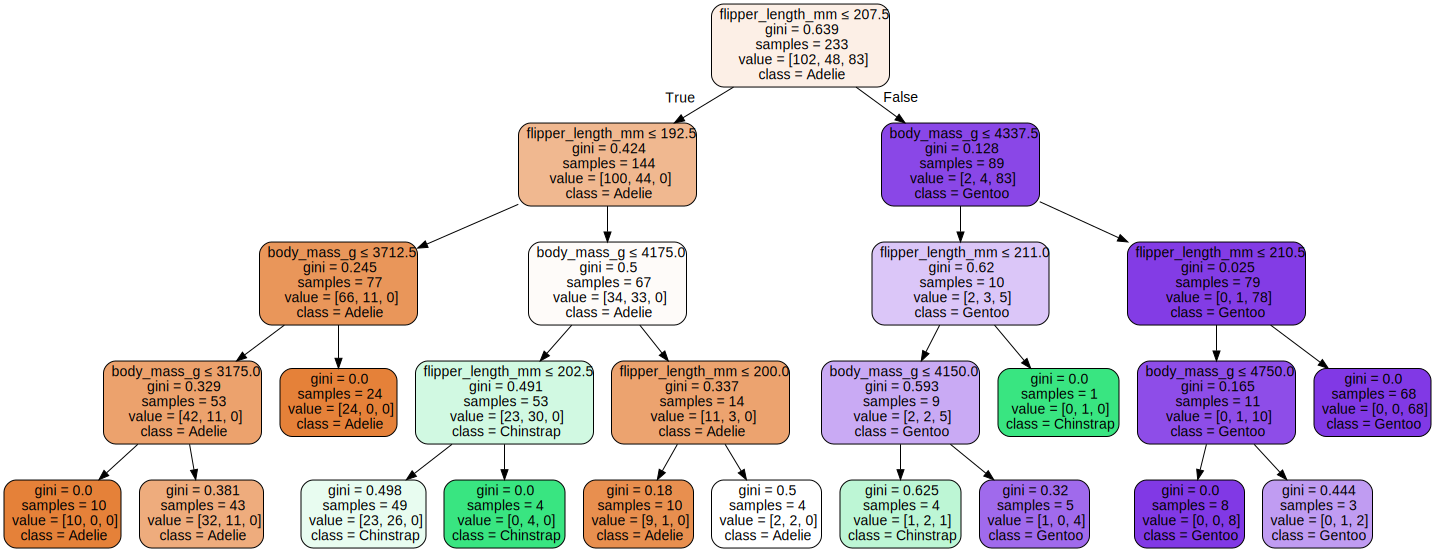

In [155]:
# Visualisation of learning

plot_tree_classification(dt, features, np.sort(penguins.species.unique()))

Based on the feature array, it will use one of the elements as conditional operator. It will be used to sort the dataset in two based on the condition. Each of those arrays will have a gini-value. If the gini value is low, it shows that the array is populated with mostly elements of one type. If the gini is 0 it will stop the iteration proces, otherwise it will proceed until till max_depth value.

In this case splits the dataset in two by checking the flipperlength of each element. If bigger than the value it will create a array with only that elements and the other array with elements with smaller flipper length than described. The last array will then be filtered on body mass in g. If bigger than the condition, it will split the array in two and this process will be repeated. 

In [156]:
# Calculate the accuracy for both the train set predictions and test set predictions. 
# With dynamic input

def createAccuracyGraph(features, depth, dataSet, targetValue, trainingSet, testSet):
    #testResults = []
    #trainingResults = []
    types = []
    accuracyList = []
    xAxis = []
    #d = {"depth": xAxis, 'training': trainingResults, 'test': testResults}
    d2 = {"depth": xAxis, 'accuracy': accuracyList, 'type': types}
    for i in range(1, depth + 1):
        
        dt = DecisionTreeClassifier(max_depth=i)
    
        dt.fit(trainingSet[features], trainingSet[targetValue])
    
        rsTraining = dt.predict(trainingSet[features])
        rsTest = dt.predict(testSet[features])
    
        accuracyTraining = calculate_accuracy(rsTraining, trainingSet[targetValue])
        accuracyTest = calculate_accuracy(rsTest, testSet[targetValue])
        
        #testResults.append(accuracyTest)
        #trainingResults.append(accuracyTraining)
        #xAxis.append(i)
        
        # Put the test result in
        accuracyList.append(accuracyTest)
        xAxis.append(i)
        types.append("test")
        
         # Put the training result in
        accuracyList.append(accuracyTraining)
        xAxis.append(i)
        types.append("training")
        
    df = pd.DataFrame(data=d2)
    return df
    
result = createAccuracyGraph(features, 20, penguins, 'species', penguinTraining, penguinTest)

In [157]:
# Graph
sns.lineplot(data=result, x='depth', y='accuracy')

<AxesSubplot:xlabel='depth', ylabel='accuracy'>

In [158]:
f = result[result['type'] == 'test']
s = result[result['type'] == 'training']

In [159]:
f

,depth,accuracy,type
0,1,0.78,test
2,2,0.78,test
4,3,0.79,test
6,4,0.78,test
8,5,0.76,test
10,6,0.78,test
12,7,0.80,test
14,8,0.80,test
16,9,0.80,test
18,10,0.77,test


In [160]:
s

,depth,accuracy,type
1,1,0.785408,training
3,2,0.785408,training
5,3,0.819742,training
7,4,0.824034,training
9,5,0.854077,training
11,6,0.879828,training
13,7,0.905579,training
15,8,0.931330,training
17,9,0.935622,training
19,10,0.961373,training


## Sex

In [171]:
training, Test = train_test_split(penguins, test_size=0.3, random_state=4, stratify=penguins['sex'])
print(training.shape)
print(Test.shape)

(233, 7)
(100, 7)


In [172]:
# Use the train set to fit a DecisionTreeClassifier.
feat = ['body_mass_g', 'flipper_length_mm']

dt = DecisionTreeClassifier(max_depth=3)

# Applied test data to training
dt.fit(training[feat], training['sex'])

DecisionTreeClassifier(max_depth=3)

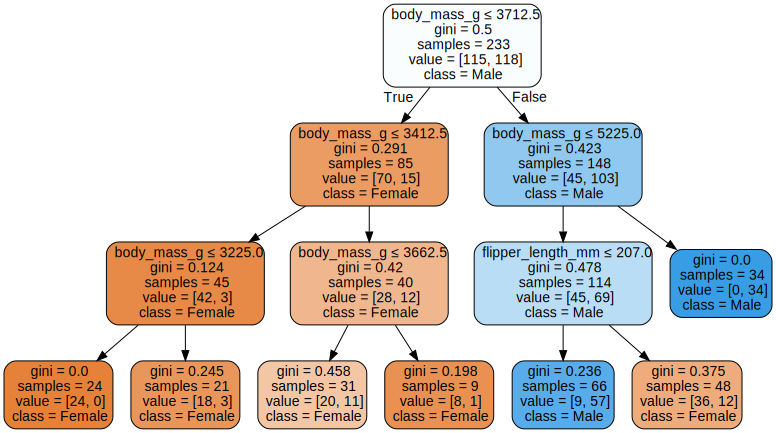

In [173]:

plot_tree_classification(dt, features, np.sort(penguins.sex.unique()))

In [175]:
# Results prediction
predictionResultTraining = dt.predict(training[feat])
predictionResultTest = dt.predict(Test[feat])

# Calculate the accuracy for both the train set predictions and test set predictions. 
accuracyTraining = calculate_accuracy(predictionResultTraining, training.sex)
accuracyTest = calculate_accuracy(predictionResultTest, Test.sex)

print(accuracyTraining)
print(accuracyTest)

0.8454935622317596
0.82
